## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
#Function to display at most 1000 rows and at most 1000 columns

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Possible issues:

### 1. I droped the features if the columns with > 10% null values.
### 2. We can deal with categorical features and numerical features seperately. For most of the categorical features, there are too much distinct possibilities. We can drop them or combine them. Oterwise, it's hard to deal with the categorical features. For example, we can combine the zipcode and the full address into one feature. For dealing with numerical Features, we're dropping the columns if them doesn't offer any important information. Could you provide the a detailed explantation to all the features? 
### 3. My idea for the differences is that we can combine some features into a new feature which is not included in the data set. For example, can we combine the zip codes and the addresses? Then we can calculate the distances between the house and the uptown. The distance is a new feature.

##  Read CSV

In [3]:
#Reading in the data
df = pd.read_csv("Parcels.csv")
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,19,30,54,55,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,FID_Parcel,map_book,map_page,map_block,lot_num,nc_pin,condo_town,parcel_typ,pid,...,FULL_ADDRE,FID_HHinco,Total_Hous,Median_Hou,TotalFamil,FamiliesIn,FamilyPove,ORIG_FID,POINT_X,POINT_Y
0,1,149,221,3,2,40,4438072484,0.0,0.0,22103240,...,LAKEVIEW DR,-1,0.0,0.0,0.0,0.0,0.0,1,-80.904352,35.074300
1,2,1960,229,37,2,95,4456981804,0.0,0.0,22937295,...,REA RD,-1,0.0,0.0,0.0,0.0,0.0,2,-80.806754,35.024313
2,3,12861,229,43,1,99,4456561498,0.0,0.0,22943199,...,WADE ARDREY RD,-1,0.0,0.0,0.0,0.0,0.0,3,-80.820251,35.017171
3,4,18653,217,25,1,15,3498832635,0.0,0.0,21725115,...,3281 TORRENCE BRANCH RD,-1,0.0,0.0,0.0,0.0,0.0,4,-81.011089,35.062212
4,5,18654,217,25,1,16,3498836911,0.0,0.0,21725116,...,TORRENCE BRANCH RD,-1,0.0,0.0,0.0,0.0,0.0,5,-81.009867,35.062922


In [4]:
len(df.columns)

87

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

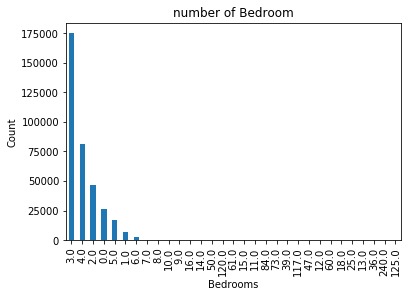

In [5]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Year')

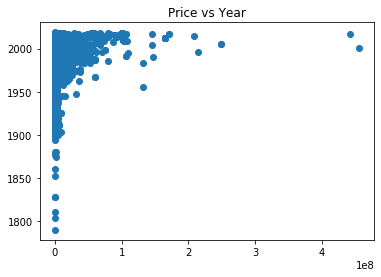

In [6]:
plt.scatter(df.price,df.yearbuilt)
plt.title("Price vs Year")

In [7]:
#Getting data distribution summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OBJECTID,427782.0,2.138915e+05,1.234902e+05,1.000000e+00,1.069462e+05,2.138915e+05,3.208368e+05,4.277820e+05
FID_Parcel,427782.0,2.065496e+05,1.198627e+05,1.000000e+00,1.027502e+05,2.065445e+05,3.102258e+05,4.143890e+05
map_book,427782.0,1.164060e+02,7.652408e+01,1.000000e+00,4.300000e+01,1.110000e+02,1.930000e+02,2.310000e+02
map_page,427782.0,1.990527e+01,1.557552e+01,1.000000e+00,8.000000e+00,1.600000e+01,2.900000e+01,8.900000e+01
lot_num,427782.0,3.461357e+01,2.944618e+01,0.000000e+00,1.100000e+01,2.500000e+01,5.200000e+01,9.900000e+01
nc_pin,427782.0,4.572522e+09,2.353878e+08,3.487891e+09,4.524834e+09,4.554639e+09,4.583732e+09,5.533640e+09
condo_town,427336.0,1.669225e-01,4.808940e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
parcel_typ,427432.0,1.417068e-02,3.107276e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
totalac,397254.0,6.370322e+00,3.302877e+02,0.000000e+00,0.000000e+00,1.600000e-02,2.580000e-01,8.041900e+04
houseno,390289.0,6.484496e+03,4.886331e+03,1.000000e+02,2.321000e+03,5.720000e+03,9.616000e+03,3.331500e+04


In [8]:
#Displaying the % of null values per feature
display_all(df.isnull().sum().sort_index()/len(df)*100)

FID_HHinco      0.000000
FID_Parcel      0.000000
FULL_ADDRE      3.927468
FamiliesIn      0.000000
FamilyPove      0.000000
Median_Hou      0.068259
OBJECTID        0.000000
ORIG_FID        0.000000
POINT_X         0.000000
POINT_Y         0.000000
TotalFamil      0.000000
Total_Hous      0.000000
accounttyp      2.845141
actype         14.153003
aheatingty     14.153003
bedrooms       16.756900
bldggrade      14.154172
cardno          2.845141
cdebuildin     14.153003
city            2.877400
codemunici      3.967441
commonpid       2.845141
condo_town      0.104259
cownerfirs     59.311051
cownerlast     51.894423
dateannexe     81.561169
dateofsale      7.744599
deedbook        7.896779
deedpage        7.901221
descbuildi     14.153003
descproper     14.153003
extravalue      2.845375
extwall        14.153003
fireplaces     14.153003
foundation     14.153003
fullbaths      14.744893
grantor        37.598356
halfbaths      15.886363
heatedarea     14.176380
heatedfuel     14.153003


# Filling NAs with -1 and then making categorical variables into numeric

In [9]:
df

,OBJECTID,FID_Parcel,map_book,map_page,map_block,lot_num,nc_pin,condo_town,parcel_typ,pid,...,FULL_ADDRE,FID_HHinco,Total_Hous,Median_Hou,TotalFamil,FamiliesIn,FamilyPove,ORIG_FID,POINT_X,POINT_Y
0,1,149,221,3,2,40,4438072484,0.0,0.0,22103240,...,LAKEVIEW DR,-1,0.0,0.0,0.0,0.0,0.000000,1,-80.904352,35.074300
1,2,1960,229,37,2,95,4456981804,0.0,0.0,22937295,...,REA RD,-1,0.0,0.0,0.0,0.0,0.000000,2,-80.806754,35.024313
2,3,12861,229,43,1,99,4456561498,0.0,0.0,22943199,...,WADE ARDREY RD,-1,0.0,0.0,0.0,0.0,0.000000,3,-80.820251,35.017171
3,4,18653,217,25,1,15,3498832635,0.0,0.0,21725115,...,3281 TORRENCE BRANCH RD,-1,0.0,0.0,0.0,0.0,0.000000,4,-81.011089,35.062212
4,5,18654,217,25,1,16,3498836911,0.0,0.0,21725116,...,TORRENCE BRANCH RD,-1,0.0,0.0,0.0,0.0,0.000000,5,-81.009867,35.062922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427777,427778,410475,43,25,C,99,4567107084,1.0,0.0,04325C99,...,5545 SETHS DR #902,419,290.0,31250.0,171.0,31.0,0.181287,428333,-80.804046,35.302868
427778,427779,410476,43,25,C,99,4567107084,1.0,0.0,04325C99,...,5549 SETHS DR #903,419,290.0,31250.0,171.0,31.0,0.181287,428334,-80.804046,35.302868
427779,427780,410477,43,25,C,99,4567107084,1.0,0.0,04325C99,...,5553 SETHS DR #904,419,290.0,31250.0,171.0,31.0,0.181287,428335,-80.804046,35.302868
427780,427781,410478,43,25,C,99,4567107084,1.0,0.0,04325C99,...,5557 SETHS DR #905,419,290.0,31250.0,171.0,31.0,0.181287,428336,-80.804046,35.302868


In [10]:
center_x = -80.841
center_y = 35.2225
df['distance_from_center'] = (df['POINT_X']-center_x)**2 + (df['POINT_Y']-center_y)**2

# Graphing age/price based on location

In [11]:
df['age'] = 2020-df['yearbuilt']
df['age']

0         42.0
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
427777    15.0
427778    15.0
427779    15.0
427780    15.0
427781    15.0
Name: age, Length: 427782, dtype: float64

Charlotte is a very new city. A large number of houses were built within the last 20 years as can be seen from the red dominated map. The main place where older houses are present seems to be on the perimeter of a circle around downtown. The blank spot west of downtown seems to be the airport

### Prices Vs Age

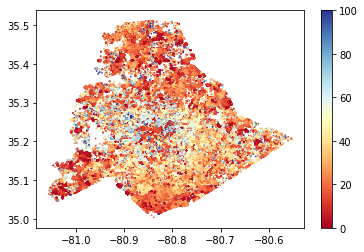

In [12]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(df['POINT_X'], df['POINT_Y'], c =df['age'], cmap=cm, vmin=0, vmax=100, s=.5)
plt.colorbar()
plt.show()

### The distribution of prices in Charlotte

Looking at the distribution of prices in Charlotte we can see the presence of more expensive houses in the South Charlotte. There is also a cluster of more expensive houses in the north likely because of Lake Norman.

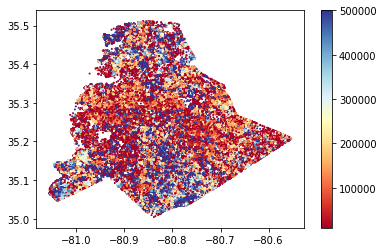

In [13]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(df['POINT_X'], df['POINT_Y'], c = df['price'], cmap=cm, vmin=10000, vmax=500000, s=1)
plt.colorbar()
plt.show()

In [14]:
sum(df['heatedarea'])/len(df['heatedarea'])

nan

## Checking for Duplicates

In [15]:
df[df.duplicated(keep=False)]

,OBJECTID,FID_Parcel,map_book,map_page,map_block,lot_num,nc_pin,condo_town,parcel_typ,pid,...,Total_Hous,Median_Hou,TotalFamil,FamiliesIn,FamilyPove,ORIG_FID,POINT_X,POINT_Y,distance_from_center,age


In [16]:
#Displaying the % of null values per feature
display_all(df.isnull().sum().sort_index()/len(df))

FID_HHinco              0.000000
FID_Parcel              0.000000
FULL_ADDRE              0.039275
FamiliesIn              0.000000
FamilyPove              0.000000
Median_Hou              0.000683
OBJECTID                0.000000
ORIG_FID                0.000000
POINT_X                 0.000000
POINT_Y                 0.000000
TotalFamil              0.000000
Total_Hous              0.000000
accounttyp              0.028451
actype                  0.141530
age                     0.141572
aheatingty              0.141530
bedrooms                0.167569
bldggrade               0.141542
cardno                  0.028451
cdebuildin              0.141530
city                    0.028774
codemunici              0.039674
commonpid               0.028451
condo_town              0.001043
cownerfirs              0.593111
cownerlast              0.518944
dateannexe              0.815612
dateofsale              0.077446
deedbook                0.078968
deedpage                0.079012
descbuildi

In [17]:
# Drop columns with > 30% null values
df = df.dropna(axis=1, thresh=.70*len(df))

In [18]:
#Dropping FID_HHinco FID_Parcel FULL_ADDRE OBJECTID ORIG_FID city mailaddr1 map_block map_book map_page municipali 
#ownerlastn ownerno ownertype parcel_typ pid state stdir stname stsuffix sttype taxfire 
df_cleaned = df.drop(columns=['FID_HHinco', 'FID_Parcel', 'FULL_ADDRE','OBJECTID', 'ORIG_FID','city','mailaddr1',
                'map_block','map_book','map_page','municipali','ownerlastn','ownerno','ownertype','parcel_typ',
                'pid','state','stdir','stname','stsuffix','sttype','taxfire', 'accounttyp','descbuildi',
                'propertyus','descproper','ownerfirst', 'netbldgval', 'extravalue','landvalue','totalvalue',
                'lot_num','nc_pin','legal_from','commonpid','taxpid','houseno','cardno','deedbook','deedpage','legalrefer',
                'neighbourh','parlegalde','landsequen', 'FamiliesIn', 'Total_Hous', 'FamilyPove'])

In [19]:
# Drop remaining instances with null values
df_cleaned = df_cleaned.dropna(axis = 0)

In [20]:
#Checking to make sure all null values have been dropped
display_all(df_cleaned.isnull().sum().sort_index()/len(df_cleaned))

Median_Hou              0.0
POINT_X                 0.0
POINT_Y                 0.0
TotalFamil              0.0
actype                  0.0
age                     0.0
aheatingty              0.0
bedrooms                0.0
bldggrade               0.0
cdebuildin              0.0
codemunici              0.0
condo_town              0.0
dateofsale              0.0
distance_from_center    0.0
extwall                 0.0
fireplaces              0.0
foundation              0.0
fullbaths               0.0
halfbaths               0.0
heatedarea              0.0
heatedfuel              0.0
landusecod              0.0
numfirepla              0.0
physicalde              0.0
price                   0.0
storyheigh              0.0
taxmun                  0.0
totalac                 0.0
typeofdeed              0.0
units                   0.0
vacantorim              0.0
yearbuilt               0.0
zipcode                 0.0
dtype: float64

In [21]:
df_cleaned

,condo_town,totalac,codemunici,zipcode,dateofsale,price,yearbuilt,heatedarea,cdebuildin,storyheigh,...,typeofdeed,taxmun,landusecod,physicalde,Median_Hou,TotalFamil,POINT_X,POINT_Y,distance_from_center,age
0,0.0,0.6200,4.0,32164,2/12/2007 0:00:00,11000.0,1978.0,680.0,77,1 STORY,...,SPEC WARRNTY,PINEVILLE,R120,AV,0.0,0.0,-80.904352,35.074300,0.025977,42.0
7,0.0,0.0000,0.0,28134,2/28/2017 0:00:00,215000.0,1994.0,1998.0,01,SPLIT LEVEL,...,WARRANTY D,MECKLENBURG COUNTY-UNINCORPORATED,R100,AV,0.0,0.0,-80.879021,35.046608,0.032384,26.0
13,0.0,0.3484,0.0,28134,2/4/2002 0:00:00,120000.0,1987.0,1664.0,01,2.0 STORY,...,WARRANTY D,MECKLENBURG COUNTY-UNINCORPORATED,R100,AV,0.0,0.0,-80.882605,35.050792,0.031215,33.0
14,0.0,0.1900,0.0,28278,8/1/2012 0:00:00,190000.0,2012.0,2256.0,01,1 STORY,...,WARRANTY D,MECKLENBURG COUNTY-UNINCORPORATED,R100,AV,0.0,0.0,-81.003183,35.066828,0.050537,8.0
18,0.0,4.4100,0.0,28278,5/17/2013 0:00:00,340000.0,2003.0,2668.0,01,1 STORY,...,WARRANTY D,MECKLENBURG COUNTY-UNINCORPORATED,R120,AV,0.0,0.0,-81.028522,35.051900,0.064269,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427731,1.0,0.0000,1.0,28208,4/24/2020 0:00:00,108000.0,2001.0,937.0,04,2.0 STORY,...,WARRANTY D,CHARLOTTE,R300,,31250.0,171.0,-80.804046,35.302868,0.007825,19.0
427732,1.0,0.0000,1.0,28078,3/13/2014 0:00:00,52500.0,2001.0,930.0,04,2.0 STORY,...,WARRANTY D,CHARLOTTE,R300,,31250.0,171.0,-80.804046,35.302868,0.007825,19.0
427733,1.0,0.0000,1.0,28262,1/19/2017 0:00:00,70000.0,2001.0,945.0,04,2.0 STORY,...,WARRANTY D,CHARLOTTE,R300,,31250.0,171.0,-80.804046,35.302868,0.007825,19.0
427734,1.0,0.0000,1.0,28269,4/4/2002 0:00:00,92500.0,2001.0,930.0,04,2.0 STORY,...,WARRANTY D,CHARLOTTE,R300,,31250.0,171.0,-80.804046,35.302868,0.007825,19.0


## Preparing Features


In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numerical = df_cleaned.select_dtypes(include=numerics)
df_categorical = df_cleaned.select_dtypes(exclude=numerics)

### Categorical Features

In [23]:
for i in df_categorical.columns:
    print(i)

zipcode
dateofsale
cdebuildin
storyheigh
aheatingty
heatedfuel
actype
extwall
foundation
fireplaces
bldggrade
vacantorim
typeofdeed
taxmun
landusecod
physicalde


### Numerical Features

In [24]:
for i in df_numerical.columns:
    print(i)
#'lot_num','nc_pin','legal_from','commonpid','taxpid','ownerfirst','cownerfirs','cownerlast','houseno','houseunit'
#,'mailaddr2','cardno','deedbook','deedpage','grantor','legalrefer','neighcode','neighbourh','parlegalde','landsequen'

condo_town
totalac
codemunici
price
yearbuilt
heatedarea
numfirepla
fullbaths
halfbaths
bedrooms
units
Median_Hou
TotalFamil
POINT_X
POINT_Y
distance_from_center
age


Transforming all categorical variables into numeric

In [25]:
for i in df_cleaned.columns:
    if df_cleaned[i].dtypes == 'object':
        df_cleaned[i] = df_cleaned[i].astype('category').cat.codes

In [26]:
df_cleaned.columns

Index(['condo_town', 'totalac', 'codemunici', 'zipcode', 'dateofsale', 'price',
       'yearbuilt', 'heatedarea', 'cdebuildin', 'storyheigh', 'aheatingty',
       'heatedfuel', 'actype', 'extwall', 'foundation', 'numfirepla',
       'fireplaces', 'bldggrade', 'fullbaths', 'halfbaths', 'bedrooms',
       'units', 'vacantorim', 'typeofdeed', 'taxmun', 'landusecod',
       'physicalde', 'Median_Hou', 'TotalFamil', 'POINT_X', 'POINT_Y',
       'distance_from_center', 'age'],
      dtype='object')

In [27]:
from sklearn import preprocessing

x = df_cleaned.values #returns a numpy array
x_scaled = preprocessing.normalize(x)
df_normal = pd.DataFrame(x_scaled, columns=df_cleaned.columns)


### Checking the correlation by Ridge regression

In [28]:
df_normal

,condo_town,totalac,codemunici,zipcode,dateofsale,price,yearbuilt,heatedarea,cdebuildin,storyheigh,...,typeofdeed,taxmun,landusecod,physicalde,Median_Hou,TotalFamil,POINT_X,POINT_Y,distance_from_center,age
0,0.000000,4.880113e-05,0.000315,0.335941,0.332005,0.865826,0.155691,0.053524,0.007556,0.000079,...,0.001181,0.000551,0.005825,0.000079,0.000000,0.000000,-0.006368,0.002761,2.044656e-06,0.003306
1,0.000000,0.000000e+00,0.000000,0.016504,0.022362,0.999527,0.009270,0.009289,0.000000,0.000051,...,0.000079,0.000023,0.000325,0.000005,0.000000,0.000000,-0.000376,0.000163,1.505500e-07,0.000121
2,0.000000,2.898999e-06,0.000000,0.029539,0.040556,0.998507,0.016534,0.013846,0.000000,0.000025,...,0.000141,0.000042,0.000582,0.000008,0.000000,0.000000,-0.000673,0.000292,2.597326e-07,0.000275
3,0.000000,9.981019e-07,0.000000,0.019510,0.056209,0.998102,0.010569,0.011851,0.000000,0.000005,...,0.000089,0.000026,0.000368,0.000005,0.000000,0.000000,-0.000426,0.000184,2.654801e-07,0.000042
4,0.000000,1.296613e-05,0.000000,0.010920,0.021725,0.999656,0.005889,0.007844,0.000000,0.000003,...,0.000050,0.000015,0.000218,0.000003,0.000000,0.000000,-0.000238,0.000103,1.889610e-07,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269492,0.000009,0.000000e+00,0.000009,0.006924,0.058943,0.958715,0.017763,0.008318,0.000027,0.000027,...,0.000151,0.000000,0.000746,0.000000,0.277406,0.001518,-0.000717,0.000313,6.945858e-08,0.000169
269493,0.000016,0.000000e+00,0.000016,0.011733,0.085002,0.855561,0.032609,0.015156,0.000049,0.000049,...,0.000277,0.000000,0.001369,0.000000,0.509262,0.002787,-0.001317,0.000575,1.275121e-07,0.000310
269494,0.000013,0.000000e+00,0.000013,0.010652,0.004616,0.912693,0.026090,0.012321,0.000039,0.000039,...,0.000222,0.000000,0.001095,0.000000,0.407452,0.002230,-0.001054,0.000460,1.020203e-07,0.000248
269495,0.000010,0.000000e+00,0.000010,0.008416,0.070495,0.944761,0.020437,0.009499,0.000031,0.000031,...,0.000174,0.000000,0.000858,0.000000,0.319176,0.001747,-0.000825,0.000361,7.991720e-08,0.000194


In [29]:
from sklearn import linear_model
x = df_normal.drop(columns=['price'])
y = df_normal['price']


crr = linear_model.Ridge(alpha=0.1)
crr.fit(x,y)
crr.coef_

array([ 1.97816790e-01, -4.25543559e-01, -1.27522703e-01, -2.70308616e-01,
       -2.00796625e-01, -2.03171909e+00, -9.67088093e-01,  7.69042507e-01,
       -1.95579374e-01, -1.37695416e-02, -1.02021377e-01, -9.24882258e-02,
       -6.42650862e-01,  1.36939565e+00, -1.03702538e-01, -3.77788416e-01,
       -2.95238750e-01, -1.45676375e-01, -2.75723049e-02, -2.64592665e-01,
        3.06557579e-01,  1.36953860e-02, -5.02174268e-01, -2.32909891e-01,
        3.04708385e+00, -1.10381637e-02, -1.05617047e+00,  1.47940747e+00,
        2.23347201e-01, -9.96585113e-02, -5.82872036e-04, -3.55551457e+00])

In [30]:
for i in range(len(crr.coef_)):
    if crr.coef_[i]==0:
        print(x.columns[i])

In [31]:
df_normal

,condo_town,totalac,codemunici,zipcode,dateofsale,price,yearbuilt,heatedarea,cdebuildin,storyheigh,...,typeofdeed,taxmun,landusecod,physicalde,Median_Hou,TotalFamil,POINT_X,POINT_Y,distance_from_center,age
0,0.000000,4.880113e-05,0.000315,0.335941,0.332005,0.865826,0.155691,0.053524,0.007556,0.000079,...,0.001181,0.000551,0.005825,0.000079,0.000000,0.000000,-0.006368,0.002761,2.044656e-06,0.003306
1,0.000000,0.000000e+00,0.000000,0.016504,0.022362,0.999527,0.009270,0.009289,0.000000,0.000051,...,0.000079,0.000023,0.000325,0.000005,0.000000,0.000000,-0.000376,0.000163,1.505500e-07,0.000121
2,0.000000,2.898999e-06,0.000000,0.029539,0.040556,0.998507,0.016534,0.013846,0.000000,0.000025,...,0.000141,0.000042,0.000582,0.000008,0.000000,0.000000,-0.000673,0.000292,2.597326e-07,0.000275
3,0.000000,9.981019e-07,0.000000,0.019510,0.056209,0.998102,0.010569,0.011851,0.000000,0.000005,...,0.000089,0.000026,0.000368,0.000005,0.000000,0.000000,-0.000426,0.000184,2.654801e-07,0.000042
4,0.000000,1.296613e-05,0.000000,0.010920,0.021725,0.999656,0.005889,0.007844,0.000000,0.000003,...,0.000050,0.000015,0.000218,0.000003,0.000000,0.000000,-0.000238,0.000103,1.889610e-07,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269492,0.000009,0.000000e+00,0.000009,0.006924,0.058943,0.958715,0.017763,0.008318,0.000027,0.000027,...,0.000151,0.000000,0.000746,0.000000,0.277406,0.001518,-0.000717,0.000313,6.945858e-08,0.000169
269493,0.000016,0.000000e+00,0.000016,0.011733,0.085002,0.855561,0.032609,0.015156,0.000049,0.000049,...,0.000277,0.000000,0.001369,0.000000,0.509262,0.002787,-0.001317,0.000575,1.275121e-07,0.000310
269494,0.000013,0.000000e+00,0.000013,0.010652,0.004616,0.912693,0.026090,0.012321,0.000039,0.000039,...,0.000222,0.000000,0.001095,0.000000,0.407452,0.002230,-0.001054,0.000460,1.020203e-07,0.000248
269495,0.000010,0.000000e+00,0.000010,0.008416,0.070495,0.944761,0.020437,0.009499,0.000031,0.000031,...,0.000174,0.000000,0.000858,0.000000,0.319176,0.001747,-0.000825,0.000361,7.991720e-08,0.000194


In [32]:
correlations = df_cleaned.corr()
for i in correlations:
    for j in range(len(correlations[i])):
        if correlations[i][j] > .5 or correlations[i][j] <-.5:
            print(i,j)

condo_town 0
totalac 1
codemunici 2
codemunici 24
zipcode 3
dateofsale 4
price 5
yearbuilt 6
yearbuilt 32
heatedarea 7
cdebuildin 8
storyheigh 9
aheatingty 10
heatedfuel 11
actype 12
extwall 13
foundation 14
numfirepla 15
fireplaces 16
bldggrade 17
fullbaths 18
halfbaths 19
bedrooms 20
units 21
vacantorim 22
typeofdeed 23
taxmun 2
taxmun 24
landusecod 25
physicalde 26
Median_Hou 27
TotalFamil 28
POINT_X 29
POINT_Y 30
distance_from_center 31
age 6
age 32


In [33]:
correlations['price']

condo_town             -0.020041
totalac                 0.000554
codemunici              0.003005
zipcode                -0.006578
dateofsale              0.004731
price                   1.000000
yearbuilt               0.029572
heatedarea              0.426660
cdebuildin              0.130855
storyheigh              0.024782
aheatingty             -0.004859
heatedfuel             -0.005358
actype                  0.010085
extwall                 0.040951
foundation             -0.012569
numfirepla              0.145914
fireplaces             -0.000678
bldggrade               0.076400
fullbaths               0.010387
halfbaths               0.019387
bedrooms                0.015772
units                   0.428476
vacantorim             -0.008001
typeofdeed              0.033939
taxmun                 -0.004334
landusecod             -0.093079
physicalde              0.025956
Median_Hou              0.055786
TotalFamil             -0.008845
POINT_X                -0.012725
POINT_Y   

We can drop the useless features, ex, legal_from and we want to trim the categorical features with too many distinct 
classes so that when we use one hot encoding,there won't be as many features.

In [34]:
columnNames = df_categorical.columns
for column in columnNames :
    print(len(df_categorical[column].value_counts()), column)

5999 zipcode
12796 dateofsale
111 cdebuildin
12 storyheigh
16 aheatingty
6 heatedfuel
10 actype
29 extwall
12 foundation
8 fireplaces
8 bldggrade
2 vacantorim
18 typeofdeed
9 taxmun
94 landusecod
3 physicalde


In [35]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numerical = df_cleaned.select_dtypes(include=numerics)
df_categorical = df_cleaned.select_dtypes(exclude=numerics)

In [36]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = 0.75
thresholder = VarianceThreshold(threshold=(var_thresh * (1 - var_thresh)))
thresholder.fit(df_numerical)
df_numerical = df_numerical[df_numerical.columns[thresholder.get_support(indices=True)]]

In [37]:
df_numerical

,condo_town,totalac,codemunici,zipcode,dateofsale,price,yearbuilt,heatedarea,numfirepla,fullbaths,halfbaths,bedrooms,units,Median_Hou,TotalFamil,age
0,0.0,0.6200,4.0,4268,4218,11000.0,1978.0,680.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,42.0
7,0.0,0.0000,0.0,3550,4810,215000.0,1994.0,1998.0,1.0,3.0,0.0,4.0,1.0,0.0,0.0,26.0
13,0.0,0.3484,0.0,3550,4874,120000.0,1987.0,1664.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,33.0
14,0.0,0.1900,0.0,3714,10700,190000.0,2012.0,2256.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,8.0
18,0.0,4.4100,0.0,3714,7389,340000.0,2003.0,2668.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427731,1.0,0.0000,1.0,780,6640,108000.0,2001.0,937.0,0.0,2.0,1.0,2.0,1.0,31250.0,171.0,19.0
427732,1.0,0.0000,1.0,720,5216,52500.0,2001.0,930.0,0.0,2.0,1.0,2.0,1.0,31250.0,171.0,19.0
427733,1.0,0.0000,1.0,817,354,70000.0,2001.0,945.0,0.0,2.0,1.0,2.0,1.0,31250.0,171.0,19.0
427734,1.0,0.0000,1.0,824,6902,92500.0,2001.0,930.0,0.0,2.0,1.0,2.0,1.0,31250.0,171.0,19.0


### Dealing with Multicollinearity among Numerical Features using VIF Scores

### A rule of thumb is that if VIF >10 then multicollinearity is high

In [38]:
 ### Dealing with Multicollinearity among Numerical Features using VIF Scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [39]:
#Normally, the removal of each feature should be done iteratively, but in the interests of saving time, 
#we will be trimming all the features that score infinity
noMoreInfinites = -1
counter = 0
while (noMoreInfinites == -1) :
    counter += 1
    print(counter, df_numerical.shape)
    
    vifScores = calc_vif(df_numerical)
    vifScores = vifScores.replace([np.inf, -np.inf], np.nan)
    numberOfNull = vifScores['VIF'].isnull().sum()
    
    if (numberOfNull > 0) :
        vifScores = vifScores.dropna()
        featuresToKeep = vifScores['variables']
        df_numerical = df_numerical[featuresToKeep]
        
    if (numberOfNull == 0) :
        break

1 (269497, 16)


In [40]:
price = df_numerical['price']
age = df_numerical['age']

In [41]:
maxScore = vifScores['VIF'].max()
counter = 0
trimSize = 10 #Ideally, we would trim by 1 for each iteration, but to save time we'll be using a larger trim size
while (True) : 
    if (maxScore < 25) :
        trimSize = 1
        
    elif (maxScore < 50) :
        trimSize = 3
    
    elif (maxScore < 100) :
        trimSize = 5
        
    if (maxScore < 10) :
        break #We want to keep only those values with a VIF score lower than 10
    
    #Drop the feature with the highest VIF score
    vifScores = vifScores.sort_values(by=['VIF'], ascending=False)
    vifScores = vifScores.iloc[trimSize:] #Drop the rows with the highest VIF values
    maxScore = vifScores['VIF'].max()
    
    featuresToKeep = vifScores['variables']
    df_numerical = df_numerical[featuresToKeep]
    
    counter += 1
    print(counter, vifScores.shape, maxScore)
    
    #Recalculate VIF Scores
    vifScores = calc_vif(df_numerical)

1 (13, 2) 1.3599440466562764


In [42]:
display_all(vifScores)

,variables,VIF
0,bedrooms,9.134428
1,units,1.196734
2,fullbaths,4.674178
3,TotalFamil,5.768114
4,heatedarea,1.126231
5,Median_Hou,5.788485
6,numfirepla,1.279316
7,condo_town,1.136445
8,halfbaths,1.493922
9,codemunici,1.993554


# Neural Network Preparation

In [43]:
df_final_combine = pd.concat([df_numerical,df_categorical,price,age],  axis=1) 
df_non_combine = df_final_combine
df_final_combine['total_rooms']=df_final_combine['fullbaths']+df_final_combine['halfbaths']*.5+df_final_combine['bedrooms']+df_final_combine['units']
df_final_combine = df_final_combine.drop(columns=['fullbaths','halfbaths','bedrooms','units'])
# df_final_combine will have total_rooms
# df_non_combine will have fullbaths, halfbaths, bedrooms, units

In [44]:
df_final_combine.columns

Index(['TotalFamil', 'heatedarea', 'Median_Hou', 'numfirepla', 'condo_town',
       'codemunici', 'zipcode', 'dateofsale', 'totalac', 'cdebuildin',
       'storyheigh', 'aheatingty', 'heatedfuel', 'actype', 'extwall',
       'foundation', 'fireplaces', 'bldggrade', 'vacantorim', 'typeofdeed',
       'taxmun', 'landusecod', 'physicalde', 'price', 'age', 'total_rooms'],
      dtype='object')

In [45]:
#Scaling the features
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import RobustScaler

df_final = df_final_combine[df_final_combine['price']!=0] #drop rows where price is 0
df_final_non_combine = df_non_combine[df_non_combine['price']!=0]
test_results = {}

## Splitting data into train and test

In [47]:
train_dataset = df_final.sample(frac=0.8, random_state=0)
test_dataset = df_final.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

#Separate Features from labels
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [49]:
from sklearn.model_selection import train_test_split
housing_t= df_final['price']
housing_t=df_final.values.reshape(-1,1)
housing_x=df_final.drop(['price'],axis=1)



housing_train, housing_test, housingprice_train, housingprice_test = train_test_split(housing_x[:10000],housing_t[:10000], test_size=0.2, random_state=40,)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
housing_train=housing_train.values
housing_test=housing_test.values



### Random Forest Regression on combined variables


In [50]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
his=model.fit(housing_train, housingprice_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [51]:
pred = model.predict(housing_test)

In [55]:
pred_train = model.predict(housing_train)

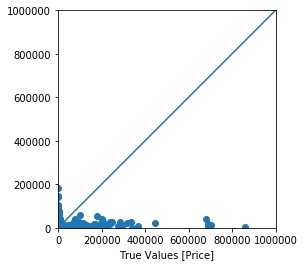

In [53]:
a = plt.axes(aspect='equal')
plt.scatter(housingprice_test[:1000], pred[:1000])
plt.xlabel("True Values [Price]")
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [57]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error on test:', metrics.mean_absolute_error(housingprice_test, pred))  


Mean Absolute Error on test: 29097.94804500117


In [58]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error on train:', metrics.mean_absolute_error(housingprice_train, pred_train)) 

Mean Absolute Error on train: 10265.060213731875


## Automatic Normalization of Data

In [59]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [60]:
#Example of normalized data
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[  507.    1602.   65786.       1.       0.       1.    3648.    6879.
      0.18     0.       1.       6.       2.       1.       1.       9.
      2.       0.       0.      15.       0.      70.       1.       8.
      6.  ]]

Normalized: [[-0.24 -0.11 -0.42  0.09 -0.35 -0.39  0.59  0.03 -0.01 -0.24 -0.86 -0.27
   0.36 -0.2  -0.99  1.   -0.06 -0.66 -0.14  0.06 -0.51 -0.19  0.07 -1.11
  -0.1 ]]


# One Variable Linear Regression - Predicting Price with Age

In [61]:
age = np.array(train_features['age'])
age_normalizer = preprocessing.Normalization(input_shape=[1,])
age_normalizer.adapt(age)

In [62]:
age_model = tf.keras.Sequential([
    age_normalizer,
    layers.Dense(units=1)
])
age_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [63]:
#Untrained model predictions
age_model.predict(age[:10])

array([[ 0.49772644],
       [ 0.09032331],
       [ 0.3905151 ],
       [-0.42429116],
       [ 0.09032331],
       [ 0.06888103],
       [-0.05977258],
       [ 0.30474597],
       [ 0.41195735],
       [-0.1884262 ]], dtype=float32)

In [64]:
age_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=10),
    loss='mean_absolute_error')

In [65]:
history = age_model.fit(
    train_features['age'], train_labels,
    epochs=20,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/20
4478/4478 [==============================] - 3s 585us/step - loss: 296474.0000 - val_loss: 282998.7812
Epoch 2/20
4478/4478 [==============================] - 2s 528us/step - loss: 254927.6406 - val_loss: 244136.9531
Epoch 3/20
4478/4478 [==============================] - 2s 533us/step - loss: 221737.1094 - val_loss: 218255.2500
Epoch 4/20
4478/4478 [==============================] - 2s 531us/step - loss: 204084.1719 - val_loss: 207367.6094
Epoch 5/20
4478/4478 [==============================] - 3s 563us/step - loss: 198318.8906 - val_loss: 204904.8594
Epoch 6/20
4478/4478 [==============================] - 3s 576us/step - loss: 197437.4062 - val_loss: 204684.4688
Epoch 7/20
4478/4478 [==============================] - 2s 557us/step - loss: 197390.9688 - val_loss: 204666.2344
Epoch 8/20
4478/4478 [==============================] - 3s 672us/step - loss: 197389.2031 - val_loss: 204664.9688
Epoch 9/20
4478/4478 [==============================] - 3s 697us/step - loss: 197389.359

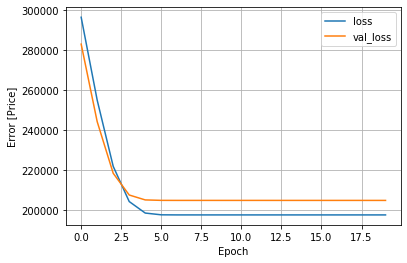

In [66]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 50, 51)
y = age_model.predict(x)
def plot_age(x, y):
    plt.scatter(train_features['age'][:50], train_labels[:50], label='Data')
    plt.plot(x, y[:100], color='k', label='Predictions')
    plt.xlabel('age')
    plt.ylabel('price')
    plt.ylim(0,1000000)
    plt.legend()
plot_age(x,y)

In [ ]:
test_results['age_model'] = age_model.evaluate(
    test_features['age'],
    test_labels, verbose=0)

# All variables linear regression

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10]) # predictions with no training

In [ ]:
linear_model.layers[1].kernel
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=10),
    loss='mean_absolute_error')

In [ ]:
history = linear_model.fit(
    train_features, train_labels, 
    epochs=20,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# Deep Neural Network regression

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'), # can add more layers/activation function
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',  # can be changed
                optimizer=tf.keras.optimizers.Adam(.1)) # learning rate
    return model

In [ ]:
#Scaling the features
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import RobustScaler

df_final = df_final_combine[df_final_combine['price']!=0]
df_final_non_combine = df_non_combine[df_non_combine['price']!=0]
test_results = {}

#####################################################################################################################

## DNN function (you can use the funtion and K-fold below)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold

In [ ]:
train_dataset = df_final.sample(frac=0.8, random_state=0)
test_dataset = df_final.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

#Separate Features from labels
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])                    # two hidden layers with 64 nodes 

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.1))
    return model
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

In [ ]:
def neuralnetwork(train, test):
    train_dataset = train
    test_dataset = test
    train_features = train_dataset.copy()
    test_features = test_dataset.copy()
    train_labels = train_features.pop('price')
    test_labels = test_features.pop('price')
    normalizer = preprocessing.Normalization()
    normalizer.adapt(np.array(train_features))
    dnn_model = build_and_compile_model(normalizer)
    history = dnn_model.fit(
        train_features, train_labels,
        validation_split=0.2,
        verbose=1, epochs=10)   # here you can change epochs
    plot_loss(history)

In [ ]:
train_dataset

In [ ]:
#Sample usage 
neuralnetwork(train_dataset, test_dataset) # put your training dataset and testing dataset here

# K Fold Cross Validation to select optimal number of hidden layers

In [ ]:
def build_and_compile_model(norm, hidden_layers):
    sequence = [norm]
    for i in range(hidden_layers):
        sequence.append(layers.Dense(64, activation='relu'))
    sequence.append(layers.Dense(1))
    model = keras.Sequential(sequence)

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.1))
    return model


def kfoldnn(df, k, epoch, min_layers, max_layers):  #Can change this to the number of layers you want to analyze
    results={}
    kfold = KFold(n_splits=k, shuffle=True)
    for train,test in kfold.split(df):
        train_dataset = df.iloc[train]
        test_dataset = df.iloc[test]
        train_features = train_dataset.copy()
        test_features = test_dataset.copy()
        train_labels = train_features.pop('price')
        test_labels = test_features.pop('price')
        normalizer = preprocessing.Normalization()
        normalizer.adapt(np.array(train_features))
        for num_layers in range(min_layers,max_layers+1): 
            dnn_model = build_and_compile_model(normalizer,num_layers)
            history = dnn_model.fit(
                train_features, train_labels,
                validation_split=1/k,
                verbose=1, epochs=epoch)
            try:
                results[num_layers].append(dnn_model.evaluate(test_features, test_labels, verbose=0))
            except:
                results[num_layers] = [dnn_model.evaluate(test_features, test_labels, verbose=0)]
    return results


In [ ]:
result = kfoldnn(df_final,2,2,1,4) # here we use 2-fold

In [ ]:
#Finding number of layers with least error
avg_result={}
for key in result.keys():
    avg_result[key]=sum(result[key])/len(result[key])
min(avg_result, key=avg_result.get)

In [ ]:
result

#####################################################################################################################

# DNN with one input

In [ ]:
dnn_age_model = build_and_compile_model(age_normalizer)
dnn_age_model.summary()

In [ ]:
history = dnn_age_model.fit(
    train_features['age'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=20)

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 100, 100)
y = dnn_age_model.predict(x)
plot_age(x, y)

In [ ]:
test_results['dnn_age_model'] = dnn_age_model.evaluate(
    test_features['age'], test_labels,
    verbose=0)

# Full Model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
train_features

In [ ]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=20)

In [ ]:
plot_loss(history)  # we can extend training with more epoch

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# DNN with all noncombined variables

In [ ]:
train_dataset_no_combine = df_final_non_combine.sample(frac=0.8, random_state=0)
test_dataset_no_combine = df_final_non_combine.drop(train_dataset_no_combine.index)

train_features_no_combine = train_dataset_no_combine.copy()
test_features_no_combine = test_dataset_no_combine.copy()

#Separate Features from labels
train_labels_no_combine = train_features_no_combine.pop('price')
test_labels_no_combine = test_features_no_combine.pop('price')

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(test_features_no_combine))
dnn_model_no_combine = build_and_compile_model(normalizer)
dnn_model_no_combine.summary()

In [ ]:
history = dnn_model_no_combine.fit(
    train_features_no_combine, train_labels_no_combine,
    validation_split=0.2,
    verbose=1, epochs=20)

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model_no_combine'] = dnn_model_no_combine.evaluate(test_features_no_combine, test_labels_no_combine, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

# Best Model's Prediction vs True Value

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels[:100], test_predictions[:100])
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)